In [1]:
#Setup
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [6]:
#Importing the latest data from Kaggle
!pip install kaggle
!mkdir .kaggle
import json
token= {"username":"umatv1699","key":"abec8bf1b9079189558a1524b4ea75e4"}
with open('/content/.kaggle/kaggle.json', 'w') as file:
    json.dump(token, file)
!cp /content/.kaggle/kaggle.json ~/.kaggle/kaggle.json
!kaggle config set -n path -v{/content}
!chmod 600 /root/.kaggle/kaggle.json
!kaggle datasets download -d sudalairajkumar/covid19-in-india -p/content
!unzip \*.zip

covid_19_india_url="covid_19_india.csv"
covid_19_india=pd.read_csv(covid_19_india_url, dayfirst=True, parse_dates=["Date"])
population_url="population_india_census2011.csv"
population=pd.read_csv(population_url)

mkdir: cannot create directory ‘.kaggle’: File exists
- path is now set to: {/content}
  0% 0.00/188k [00:00<?, ?B/s]
100% 188k/188k [00:00<00:00, 72.6MB/s]
Archive:  covid19-in-india.zip
  inflating: AgeGroupDetails.csv     
  inflating: HospitalBedsIndia.csv   
  inflating: ICMRTestingDetails.csv  
  inflating: ICMRTestingLabs.csv     
  inflating: IndividualDetails.csv   
  inflating: StatewiseTestingDetails.csv  
  inflating: covid_19_india.csv      
  inflating: population_india_census2011.csv  


In [7]:
#Importing the data shared with us along with the project problem statement
#To use the data given to us instead of the latest data, uncomment this block and comment the previous Kaggle Block of Code
"""
covid_19_india_url="https://raw.githubusercontent.com/Uma1699/MFDS-Question-3-Datasets/master/covid_19_india.csv"
covid_19_india=pd.read_csv(covid_19_india_url, index_col="Date", dayfirst=True, parse_dates=True)
population_url="https://raw.githubusercontent.com/Uma1699/MFDS-Question-3-Datasets/master/population_india_census2011.csv"
population=pd.read_csv(population_url)
"""

'\ncovid_19_india_url="https://raw.githubusercontent.com/Uma1699/MFDS-Question-3-Datasets/master/covid_19_india.csv"\ncovid_19_india=pd.read_csv(covid_19_india_url, index_col="Date", dayfirst=True, parse_dates=True)\npopulation_url="https://raw.githubusercontent.com/Uma1699/MFDS-Question-3-Datasets/master/population_india_census2011.csv"\npopulation=pd.read_csv(population_url)\n'

In [8]:
covid_19_india.tail()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
1666,1667,2020-05-06,8:00 AM,Telengana,-,-,585,29,1096
1667,1668,2020-05-06,8:00 AM,Tripura,-,-,2,0,43
1668,1669,2020-05-06,8:00 AM,Uttarakhand,-,-,39,1,61
1669,1670,2020-05-06,8:00 AM,Uttar Pradesh,-,-,987,56,2880
1670,1671,2020-05-06,8:00 AM,West Bengal,-,-,364,140,1344


In [9]:
#Reducing data to the state totals
State_wise_Confirmed=pd.DataFrame(covid_19_india.groupby("State/UnionTerritory").Confirmed.max())
State_wise_Confirmed

,Confirmed
State/UnionTerritory,
Andaman and Nicobar Islands,33
Andhra Pradesh,1717
Arunachal Pradesh,1
Assam,43
Bihar,536
Chandigarh,111
Chhattisgarh,59
Dadar Nagar Haveli,1
Delhi,5104


In [10]:
population.head()

,Sno,State / Union Territory,Population,Rural population,Urban population,Area,Density,Gender Ratio
0,1,Uttar Pradesh,199812341,155317278,44495063,"240,928 km2 (93,023 sq mi)","828/km2 (2,140/sq mi)",912
1,2,Maharashtra,112374333,61556074,50818259,"307,713 km2 (118,809 sq mi)",365/km2 (950/sq mi),929
2,3,Bihar,104099452,92341436,11758016,"94,163 km2 (36,357 sq mi)","1,102/km2 (2,850/sq mi)",918
3,4,West Bengal,91276115,62183113,29093002,"88,752 km2 (34,267 sq mi)","1,029/km2 (2,670/sq mi)",953
4,5,Madhya Pradesh,72626809,52557404,20069405,"308,245 km2 (119,014 sq mi)",236/km2 (610/sq mi),931


In [11]:
#Filtering the data
population.Density=population.Density.str.split('/km2', 1).str[0].str.strip()
population.Density=population.Density.str.replace(r',','')
population.head()

,Sno,State / Union Territory,Population,Rural population,Urban population,Area,Density,Gender Ratio
0,1,Uttar Pradesh,199812341,155317278,44495063,"240,928 km2 (93,023 sq mi)",828,912
1,2,Maharashtra,112374333,61556074,50818259,"307,713 km2 (118,809 sq mi)",365,929
2,3,Bihar,104099452,92341436,11758016,"94,163 km2 (36,357 sq mi)",1102,918
3,4,West Bengal,91276115,62183113,29093002,"88,752 km2 (34,267 sq mi)",1029,953
4,5,Madhya Pradesh,72626809,52557404,20069405,"308,245 km2 (119,014 sq mi)",236,931


In [12]:
#Merging the two table
State_wise_Confirmed["State / Union Territory"]=State_wise_Confirmed.index
State_wise_Confirmed.head()
states_data= pd.merge(State_wise_Confirmed, population, on='State / Union Territory', how='right')
states_data.head()

,Confirmed,State / Union Territory,Sno,Population,Rural population,Urban population,Area,Density,Gender Ratio
0,33.0,Andaman and Nicobar Islands,34,380581,237093,143488,"8,249 km2 (3,185 sq mi)",46,876
1,1717.0,Andhra Pradesh,10,49577103,34966693,14610410,"162,968 km2 (62,922 sq mi)",303,993
2,1.0,Arunachal Pradesh,26,1383727,1066358,317369,"83,743 km2 (32,333 sq mi)",17,938
3,43.0,Assam,15,31205576,26807034,4398542,"78,438 km2 (30,285 sq mi)",397,954
4,536.0,Bihar,3,104099452,92341436,11758016,"94,163 km2 (36,357 sq mi)",1102,918


In [13]:
#Computing Intensity
states_data["Density"] = pd.to_numeric(states_data["Density"], downcast="float")
states_data["Intensity"]=states_data.Confirmed/states_data.Density
Solution=states_data[["State / Union Territory","Intensity"]]
Solution.head()

,State / Union Territory,Intensity
0,Andaman and Nicobar Islands,0.717391
1,Andhra Pradesh,5.666667
2,Arunachal Pradesh,0.058824
3,Assam,0.108312
4,Bihar,0.486388


Text(0.5, 1.0, 'Intensity Distribution of States')

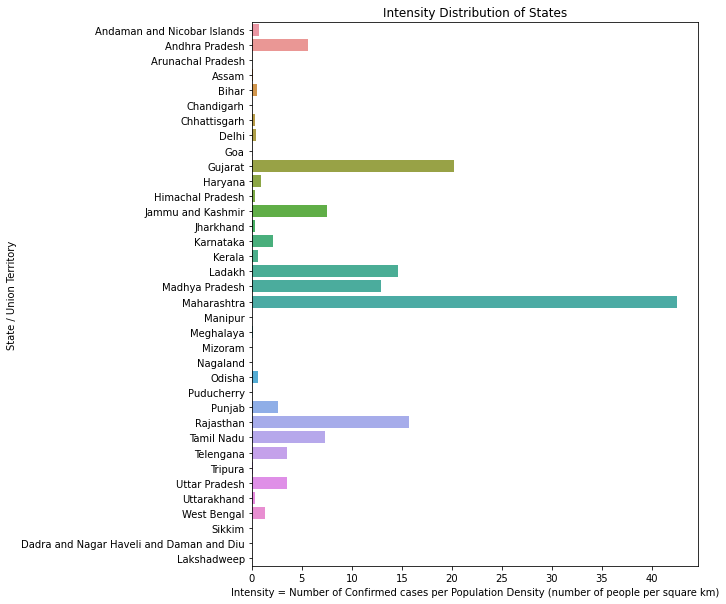

In [14]:
#Plotting Intensitites as a Bar Plot
plt.figure(figsize=(8,10))
sns.barplot(y="State / Union Territory", x="Intensity", data=Solution)
plt.xlabel("Intensity = Number of Confirmed cases per Population Density (number of people per square km)")
plt.title("Intensity Distribution of States")